### 0. Import files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 300)

In [3]:
# In the future, import train_ID and test_ID directly:
train_ID = pd.read_csv('./data/train_01_index.csv', names = ['Id'])
test_ID = pd.read_csv('./data/test_index.csv', names = ['Id'])

In [4]:
train_ID.head(2)

,Id
0,1
1,2


In [5]:
test_ID.head(2)

,Id
0,1461
1,1462


In [6]:
X_train = pd.read_csv('./data/X_train_01.csv')
X_test = pd.read_csv('./data/X_test_01.csv')
y_train = pd.read_csv('./data/y_train_01_log.csv', names = ['SalePrice'])

In [7]:
print(X_train.shape, X_test.shape, y_train.shape)

(1458, 79) (1459, 79) (1458, 1)


In [8]:
X_train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,14.0,3.0,5.831328,19.212182,1.0,0.0,3.0,3.0,1.0,0.0,2.0,16.0,4.0,4.0,4.0,6.0,2.440268,2.055642,14.187527,14.187527,1.0,2.0,11.0,11.0,2.0,8.059126,3.0,2.0,5.0,4.0,3.0,1.0,6.0,11.170327,1.0,0.0,7.483296,11.692623,5.0,4.0,1.0,3.0,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,3.0,2.602594,7.0,0.000000,0.0,5.0,14.187527,2.0,1.194318,10.506271,3.0,3.0,2.0,0.000000,5.714669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,4.0
1,11.0,3.0,6.221214,19.712205,1.0,0.0,3.0,3.0,1.0,1.0,2.0,20.0,2.0,4.0,4.0,5.0,2.259674,2.602594,14.145138,14.145138,1.0,2.0,4.0,5.0,1.0,0.000000,2.0,2.0,2.0,4.0,3.0,4.0,5.0,12.062832,1.0,0.0,8.897844,12.792276,5.0,4.0,1.0,3.0,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,2.0,2.259674,7.0,0.730463,3.0,5.0,14.145138,2.0,1.194318,10.062098,3.0,3.0,2.0,9.010206,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0


In [9]:
X_test.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,11.0,2.0,6.221214,20.479373,1.0,0.0,3.0,3.0,1.0,0.0,2.0,10.0,2.0,4.0,4.0,5.0,2.055642,2.259674,14.121376,14.121376,1.0,2.0,11.0,11.0,1.0,0.000000,2.0,2.0,2.0,3.0,3.0,1.0,3.0,10.105326,2.0,7.397498,8.780689,11.775114,5.0,2.0,1.0,3.0,11.818680,0.0,0.0,11.818680,0.0,0.0,0.730463,0.000000,1.194318,0.730463,2.0,2.055642,7.0,0.0,0.0,5.0,14.121376,1.0,0.730463,11.259868,3.0,3.0,2.0,7.338607,0.00000,0.0,0.0,7.020909,0.0,0.0,3.0,0.0,0.000000,2.0,1.0,4.0,4.0
1,11.0,3.0,6.244956,21.327220,1.0,0.0,2.0,3.0,1.0,2.0,2.0,10.0,4.0,4.0,4.0,5.0,2.259674,2.259674,14.116605,14.116605,4.0,2.0,5.0,4.0,2.0,6.808145,2.0,2.0,2.0,3.0,3.0,1.0,5.0,11.901094,1.0,0.000000,9.752379,12.943735,5.0,2.0,1.0,3.0,12.943735,0.0,0.0,12.943735,0.0,0.0,0.730463,0.730463,1.540963,0.730463,3.0,2.259674,7.0,0.0,0.0,5.0,14.116605,1.0,0.730463,9.118181,3.0,3.0,2.0,9.672623,4.79213,0.0,0.0,0.000000,0.0,0.0,0.0,3.0,20.777526,2.0,1.0,4.0,4.0


In [10]:
y_train.head(2)

,SalePrice
0,12.247694
1,12.109011


In [11]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [12]:
import sklearn.cross_validation as cv
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [13]:
from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# import xgboost as xgb
# import lightgbm as lgb

# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# from sklearn.ensemble import RandomForestRegressor

In [14]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [15]:
model_score_df = pd.DataFrame(columns = ['Model', 'RMSLE.mean', 'RMSLE.std'])
model_score_df

,Model,RMSLE.mean,RMSLE.std


### 1. Kernel Ridge Regression

In [24]:
# Round 1
grid_param = {'alpha': np.linspace(0, 15, 6), \
              'kernel': ['polynomial'], \
              'degree': [2, 3], \
              'coef0': np.linspace(0, 5, 6)}
krr_search = GridSearchCV(estimator = KernelRidge(), \
                          param_grid=grid_param, \
                          cv=n_folds, return_train_score=True)
krr_search = krr_search.fit(X_train, y_train)

In [25]:
print('Training accuracy:',krr_search.score(X_train, y_train))
krr_search.best_score_, krr_search.best_params_

Training accuracy: 0.9507821652228595


(0.9077002438654783,
 {'alpha': 9.0, 'coef0': 5.0, 'degree': 2, 'kernel': 'polynomial'})

In [36]:
# Round 2
grid_param = {'alpha': np.linspace(8, 10, 10), \
              'kernel': ['polynomial'], \
              'degree': [2, 3], \
              'coef0': np.linspace(45, 55, 10)}
krr_search = GridSearchCV(estimator = KernelRidge(), \
                          param_grid=grid_param, \
                          cv=n_folds, return_train_score=True)
krr_search = krr_search.fit(X_train, y_train)

In [37]:
print('Training accuracy:',krr_search.score(X_train, y_train))
krr_search.best_score_, krr_search.best_params_

Training accuracy: 0.9524283739056469


(0.9137844410506751,
 {'alpha': 10.0, 'coef0': 55.0, 'degree': 2, 'kernel': 'polynomial'})

In [89]:
# Round n
grid_param = {'alpha': np.linspace(24, 25, 20), \
              'kernel': ['polynomial'], \
              'degree': [2], \
              'coef0': np.linspace(175, 176, 20)}
krr_search = GridSearchCV(estimator = KernelRidge(), \
                          param_grid=grid_param, \
                          cv=n_folds, return_train_score=True)
krr_search = krr_search.fit(X_train, y_train)

In [90]:
print('Training accuracy:',krr_search.score(X_train, y_train))
krr_search.best_score_, krr_search.best_params_

Training accuracy: 0.9455042726899986


(0.9150789143033558,
 {'alpha': 24.57894736842105,
  'coef0': 175.57894736842104,
  'degree': 2,
  'kernel': 'polynomial'})

In [16]:
model_KRR = KernelRidge(alpha=24.57894736842105, kernel='polynomial', degree=2, coef0=175.57894736842104)

In [17]:
model_KRR.fit(X_train, y_train)
y_pred = model_KRR.predict(X_train)
np.corrcoef(np.array(y_train).flatten(), y_pred.flatten())

array([[1.       , 0.9724155],
       [0.9724155, 1.       ]])

In [18]:
y_pred.shape, np.array(y_train).flatten().shape

((1458, 1), (1458,))

In [19]:
score = rmsle_cv(model_KRR)
print('KRR score: {} ({})'.format(score.mean(), score.std()))

KRR score: 0.11609570659402742 (0.00304568057804904)


In [20]:
data = pd.Series({'Model': 'KRR', 'RMSLE.mean': score.mean(), 'RMSLE.std': score.std()})
model_score_df = model_score_df.append(data, ignore_index = True)
model_score_df

,Model,RMSLE.mean,RMSLE.std
0,KRR,0.116096,0.003046


In [21]:
line_11_x = [2000, 700000]
line_11_y = [2000, 700000]

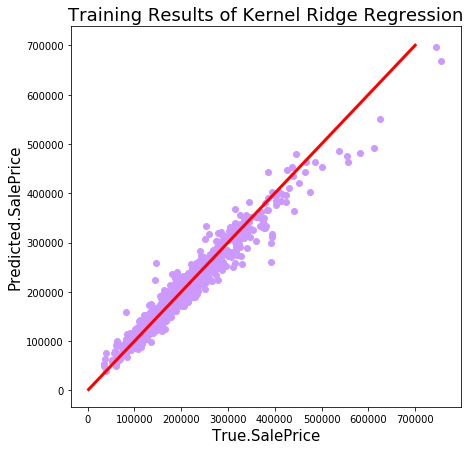

In [22]:
plt.figure(figsize=(7, 7))
plt.plot(line_11_x, line_11_y, lw=3, c = 'r')
plt.scatter(np.exp(y_train), np.exp(model_KRR.predict(X_train)), c='#CC99FF')
plt.xlabel('True.SalePrice', fontsize=15)
plt.ylabel('Predicted.SalePrice', fontsize=15)
plt.title('Training Results of Kernel Ridge Regression', fontsize=18)
plt.show()

In [23]:
y_test = np.exp(model_KRR.predict(X_test.values))
type(y_test), y_test.shape

(numpy.ndarray, (1459, 1))

In [24]:
submit = pd.DataFrame(columns = ['SalePrice'])
submit['Id'] = test_ID['Id']
submit['SalePrice'] = y_test
submit.head()

,SalePrice,Id
0,119570.372505,1461
1,176715.756452,1462
2,180021.997575,1463
3,195217.479026,1464
4,197273.580100,1465


In [25]:
submit.to_csv('./data/submission_04_KRR.csv', index=False)

In [105]:
802/4406 # 0.11984 > 0.11717

0.1820245120290513